___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />


# SEGUNDO EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Nombre: Pablo Ángel Mendoza Aguirre

## Fecha: 19 de Octubre del 2018

## Por: Oscar David Jaramillo Zuluaga.

# 1.
La financiera ”El cerdito feliz” atiende la apertura de cuentas de ahorro en su sucursal matriz, en esta sucursal se tienen 4 ejecutivos para atención al inversionista, teniendo una media de tiempo para la atención de un cliente de 30 minutos, aunque con frecuencia se requiere que uno de los ejecutivos participe en juntas de evaluación de crédito, lo que provoca que el equipo de atención disminuya a 3 ejecutivos y en estas circunstancias el promedio de atención por cliente aumenta a 45 minutos. El tiempo entre la llegada de cada cliente en promedio es de 25 minutos, si la apertura de la sucursal es a las 9:00 a.m. y cierra su atención al público a las 14:00 horas, realiza una simulación de mímino 1000 escenarios y responda

a).Justifique que tipo de distribuciones de probabilidad va a utilizar para realizar montecarlo.
> La distribución de poisson permite conocer la probabilidad de occurencia de un evento aleatoio con resutado discreto, como los tiempos de llegada de los clientes.

>Por otra parte el tiempo de atención es una variable que por lo general distribuye de forma exponencial.


In [1]:
import time
import random
import math as mt
import numpy as np
import pandas as pd
import scipy.stats as st
import scipy.special as sps 
from itertools import cycle 
from functools import reduce
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import poisson
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
# De 9:00-14:00 hay 300 minutos entonces solo se puede atender a un número limitado de personas
# La empresa atiende clientes solo 5 horas y llegan en promedio cada 25 minutos.
def dia_laboral(media_ejecutivos:"tiempo medio de atención de los ejecutivos",):
    '''Esta función simula "n" dias laborales'''
    sim = 25
    llegada = poisson.rvs(25, size=sim) #tiempos de llegada
    atencion = expon.rvs(media_ejecutivos,size = sim) #tiempos de atención
    i,tot1,tot2,j = 0,0,0,0
    while tot1<= 300:
        tot1+=atencion[i]
        i+=1
    atend = i
    while tot2<= 300:
        tot2+=llegada[j]
        j+=1
    no_atend = (j)-i
    return atend, no_atend

b). ¿Cuántas personas se atenderán hasta las 14:00 horas, si el equipo está formado solo por 3 ejecutivos?, ¿cuántos quedarán en cola?
   
c). ¿Cuántas personas se atenderán hasta las 14:00 horas, si el equipo está formado solo por 4 ejecutivos?, ¿Cuántos quedarán en cola?

In [3]:
#inciso b)
x=(list(map(lambda n: dia_laboral(45),np.arange(1000))))
tot1 = list(map(lambda x: (x[0]), x))
tot2 = list(map(lambda x: (x[1]), x))
print('Las cantidad de personas atendidas en promedio fue de: ', np.mean(tot1))
print('Las cantidad de personas no atendidas en promedio fue de: ', np.mean(tot2))

Las cantidad de personas atendidas en promedio fue de:  7.0
Las cantidad de personas no atendidas en promedio fue de:  5.532


In [4]:
#inciso c)
x=(list(map(lambda n: dia_laboral(30),np.arange(1000))))
tot1 = list(map(lambda x: (x[0]), x))
tot2 = list(map(lambda x: (x[1]), x))
print('Las cantidad de personas atendidas en promedio fue de: ', np.mean(tot1))
print('Las cantidad de personas no atendidas en promedio fue de: ', np.mean(tot2))

Las cantidad de personas atendidas en promedio fue de:  10.0
Las cantidad de personas no atendidas en promedio fue de:  2.538


# 2 
a). Demuestre que la distribución de poisson satisface la siguiente forma recursiva de su probabilidad
$$ p(k+1)={\lambda \over k+1}p(k)$$

La distribución de Poisson, se modela mediante la siguente función:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
Analizando esta función se pueden deducir 2 cosas, primero que 

$$p_k=\frac{e^{-\lambda}(\lambda)^k}{k!}\hspace{1cm} (1)$$

y también que 

$$p_{k+1}=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!} \hspace{1cm} (2)$$

sustituyendo las $i$ de la ecuación (1) por $(i+1)$. Para que la ecuación (2) quede de forma recursiva, es decir, en términos de $p_k$, se hace lo siguiente, se toma la ecuación (2) y se separan los factoriales de la siguiente forma $(k+1)(k!) = (k+1)!$ y a su vez se separan los exponentes, dando como resultado:

$$p_{k+1} = \frac{e^{-\lambda}(\lambda)^{k}}{k!} \frac{\lambda}{k+1} $$

Lo anterior se puede simplificar sustituyendo la ecuación (1), de forma ya es recursiva.

$$ p_{k+1} = \frac{\lambda}{k+1} p_{k} $$

b). De el resultado demostrado en el inciso a) (usando la ecuación recursiva), gráfique la función de distribución de probabilidad y su función acumulada, para $\lambda = [4,10,30]$, valide sus resultados comparando con el paquete estadístico `scipy.stats`. Posteriormente, genere muestras aletorias que distribuyan poisson con el conjunto de parámetros lambda dados y realice el histograma correspondiente (en gráficas distintas para cada lambda), validando lo obtenido al graficar la función de densidad de probabilidad. **Nota**: Recuerde que la distribución de poisson es una distribución de probabilidad discreta así que el histograma debe ser discreto y no continuo.

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


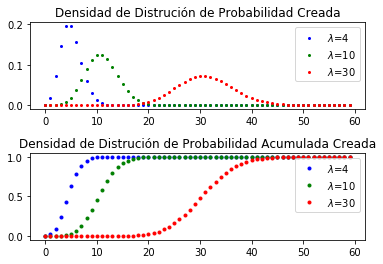

<function matplotlib.pyplot.show(*args, **kw)>

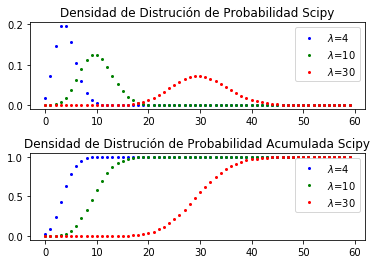

In [5]:
cycol = cycle('bgrcmk')#colores del ciclo
N = 60 #limite superior en x
k = np.arange(0,N) #numeros del eje x
l = [4,10,30] #lambda
p = lambda k,l:(l**k*np.exp(-l))/sps.gamma(k) #función, se toma el caso particular gamma
ones = np.ones(len(k))
for lamb2 in l:
    L = lamb2*ones#vector de unos por el respectivo l para generar esos puntitos
    P = list(map(p,k,L))#se sustitullen las lambdas para todos los valores del eje x
    c = next(cycol) #cambia color 
    #Graficar
    plt.subplot(211)
    plt.title('Densidad de Distrución de Probabilidad Creada')
    plt.plot(P/np.sum(P),'o',c=c,label='$\lambda$=%d' % lamb2, markersize=2)
    plt.legend()
    plt.subplot(212)
    plt.plot(np.cumsum(P/np.sum(P)),'o',c=c,label='$\lambda$=%s' % lamb2, markersize=3)
    plt.title('Densidad de Distrución de Probabilidad Acumulada Creada')
    plt.legend()
    plt.subplots_adjust(hspace=0.5)
plt.show()
#Comparacióbn con Scipy stats.
a = poisson.pmf(k, 4, loc=0)
b = poisson.pmf(k, 10, loc=0)
d = poisson.pmf(k, 30, loc=0)
e = poisson.cdf(k, 4, loc=0)
f = poisson.cdf(k, 10, loc=0)
g = poisson.cdf(k, 30, loc=0)
plt.subplot(211)
plt.title('Densidad de Distrución de Probabilidad Scipy')
plt.plot(a,'o',c='b',label='$\lambda$=%d' % 4, markersize=2)
plt.plot(b,'o',c='g',label='$\lambda$=%d' % 10, markersize=2)
plt.plot(d,'o',c='r',label='$\lambda$=%d' % 30, markersize=2)
plt.legend()
plt.subplot(212)
plt.title('Densidad de Distrución de Probabilidad Acumulada Scipy')
plt.plot(e,'o',c='b',label='$\lambda$=%d' % 4, markersize=2)
plt.plot(f,'o',c='g',label='$\lambda$=%d' % 10, markersize=2)
plt.plot(g,'o',c='r',label='$\lambda$=%d' % 30, markersize=2)
plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.show

In [6]:
# Función que calcula la probabilidad acumulada
def P_acum_Poisson(p,N):
    n = N
    pr = [np.exp(-p)]
    add = pr.append
    for i in range(n+1):
        add(((p)/(i+1))*pr[-1])
    return np.cumsum(pr)

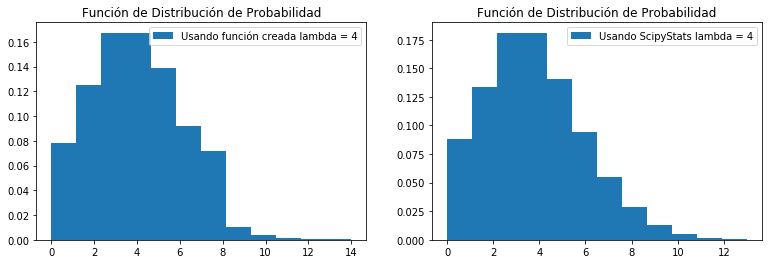

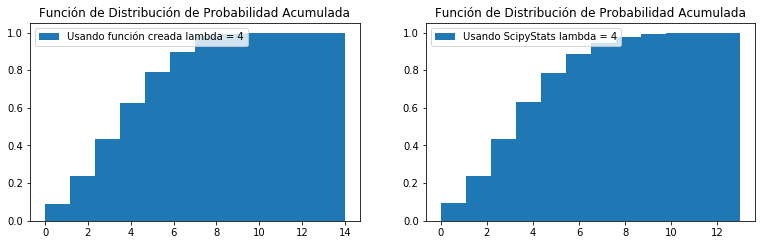

In [7]:
p = 4; N = 10**4
p_acum = P_acum_Poisson(p,N)
u = np.random.rand(N)
# Gráfica de resultados de Distribución de Probabilidad
plt.figure(figsize=[13,4])
plt.subplot(121)
d_poisson = list(map(lambda j:sum(1 for i in p_acum if i<=u[j]),range(N)))
plt.hist(d_poisson,12,density=True,label='Usando función creada lambda = 4')
plt.title('Función de Distribución de Probabilidad')
plt.legend()

plt.subplot(122)
d_poi_stats  = st.poisson.rvs(p,size=N)
plt.hist(d_poi_stats,12,density=True,label='Usando ScipyStats lambda = 4')
plt.legend()
plt.title('Función de Distribución de Probabilidad')
np.histogram
plt.show()
# Gráfica de resultados de Distribución de Probabilidad Acumulada

plt.figure(figsize=[13,8])
plt.subplot(221)
unique, counts = np.unique(d_poisson, return_counts=True)
plt.hist(unique,12, density=True,label='Usando función creada lambda = 4', cumulative = True , weights = counts)
plt.title('Función de Distribución de Probabilidad Acumulada')
plt.legend()

plt.subplot(222)
h2 = st.cumfreq(d_poi_stats, numbins=12)
plt.hist(d_poi_stats,12,density=True,label='Usando ScipyStats lambda = 4', cumulative = True)
plt.legend()
plt.title('Función de Distribución de Probabilidad Acumulada')
plt.show()

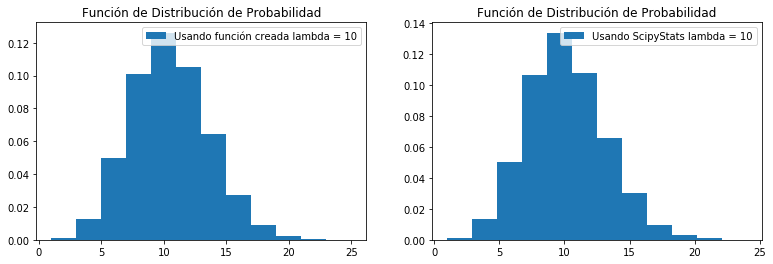

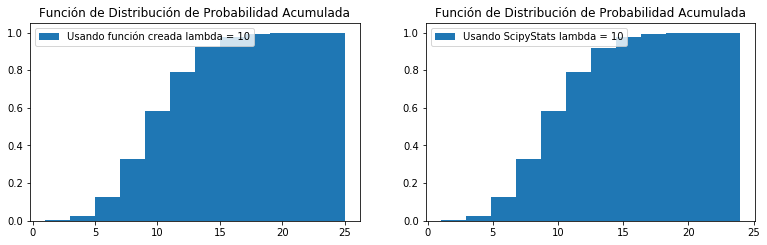

In [8]:
p = 10; N = 10**4
p_acum = P_acum_Poisson(p,N)
u = np.random.rand(N)
# Gráfica de resultados de Distribución de Probabilidad
plt.figure(figsize=[13,4])
plt.subplot(121)
d_poisson = list(map(lambda j:sum(1 for i in p_acum if i<=u[j]),range(N)))
plt.hist(d_poisson,12,density=True,label='Usando función creada lambda = 10')
plt.title('Función de Distribución de Probabilidad')
plt.legend()

plt.subplot(122)
d_poi_stats  = st.poisson.rvs(p,size=N)
plt.hist(d_poi_stats,12,density=True,label='Usando ScipyStats lambda = 10')
plt.legend()
plt.title('Función de Distribución de Probabilidad')
np.histogram
plt.show()
# Gráfica de resultados de Distribución de Probabilidad Acumulada

plt.figure(figsize=[13,8])
plt.subplot(221)
unique, counts = np.unique(d_poisson, return_counts=True)
plt.hist(unique,12, density=True,label='Usando función creada lambda = 10', cumulative = True , weights = counts)
plt.title('Función de Distribución de Probabilidad Acumulada')
plt.legend()

plt.subplot(222)
h2 = st.cumfreq(d_poi_stats, numbins=12)
plt.hist(d_poi_stats,12,density=True,label='Usando ScipyStats lambda = 10', cumulative = True)
plt.legend()
plt.title('Función de Distribución de Probabilidad Acumulada')
plt.show()

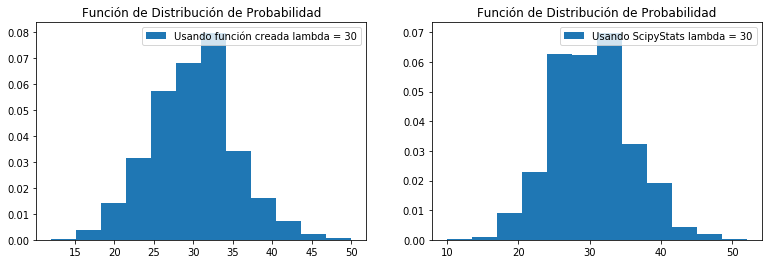

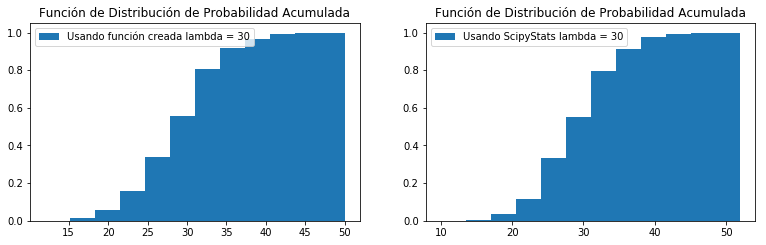

In [9]:
p = 30; N = 10**4
p_acum = P_acum_Poisson(p,N)
u = np.random.rand(N)
# Gráfica de resultados de Distribución de Probabilidad
plt.figure(figsize=[13,4])
plt.subplot(121)
d_poisson = list(map(lambda j:sum(1 for i in p_acum if i<=u[j]),range(N)))
plt.hist(d_poisson,12,density=True,label='Usando función creada lambda = 30')
plt.title('Función de Distribución de Probabilidad')
plt.legend()

plt.subplot(122)
d_poi_stats  = st.poisson.rvs(p,size=N)
plt.hist(d_poi_stats,12,density=True,label='Usando ScipyStats lambda = 30')
plt.legend()
plt.title('Función de Distribución de Probabilidad')
np.histogram
plt.show()
# Gráfica de resultados de Distribución de Probabilidad Acumulada

plt.figure(figsize=[13,8])
plt.subplot(221)
unique, counts = np.unique(d_poisson, return_counts=True)
plt.hist(unique,12, density=True,label='Usando función creada lambda = 30', cumulative = True , weights = counts)
plt.title('Función de Distribución de Probabilidad Acumulada')
plt.legend()

plt.subplot(222)
h2 = st.cumfreq(d_poi_stats, numbins=12)
plt.hist(d_poi_stats,12,density=True,label='Usando ScipyStats lambda = 30', cumulative = True)
plt.legend()
plt.title('Función de Distribución de Probabilidad Acumulada')
plt.show()

# 3
Demostrar **Teoricamente** usando el método de máxima verosimilitud, que los estimadores para los parámetros $\mu$ y $\sigma$ de una distribución normal, estan dados por:

$$\hat \mu = {1\over n}\sum_{i=1}^n x_i,\quad \hat  \sigma^2={1\over n}\sum_{i=1}^n (x_i-\hat \mu)^2$$

**Recuerde que:** La distribución normal es
$$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

Se tiene que $f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$, entonces se dice que $L(f) = f_{1}(x\mid \mu ,\sigma ^{2})f_{2}(x\mid \mu ,\sigma ^{2})f_{3}(x\mid \mu ,\sigma ^{2})...f_{n}(x\mid \mu ,\sigma ^{2})$, para el precedimiento se hará la siguiente simplificación $v = \sigma^{2}$:

$$L(f) = \prod_{i=1}^{n} f_{i}(x\mid \mu ,v) = \prod_{i=1}^{n}  \frac{1}{\sqrt{2 \pi v}} e^{- \frac{(x_{i} - \mu)^2}{2 v}} \longrightarrow (\frac{1}{\sqrt{2 \pi v}})^{n} e^{- \frac{1}{2 v} \sum_{i=1}^n (x_i- \mu)^2}$$

Se sabe que maximizar la función de máxima verosimilitud $L(\theta)$ es equivalente a maximizar su logaritmo $l(\theta)= ln(L(\theta))$, por lo que:

$$ln(L(f)) = n ln(1) - n ln(\sqrt{2 \pi v}) - \frac{1}{2 v} \sum_{i=1}^n (x_i- \mu)^2 \longrightarrow 0 - \frac{n}{2} ln(2 \pi v) - \frac{1}{2 v} \sum_{i=1}^n (x_i- \mu)^2 \longrightarrow - \frac{n}{2} ln(2 \pi) - \frac{n}{2} ln(v) - \frac{1}{2 v} \sum_{i=1}^n (x_i- \mu)^2 $$

A continuación se deriva parcialmente el resultado respecto de $\mu$ y $v$, entonces

$$ \frac{\partial ln(L(f))}{\partial \mu} = 0 - 0 - \frac{2}{2} \frac{1}{v} \sum_{i=1}^n (x_i- \mu) = \frac{1}{v} \sum_{i=1}^n (x_i- \mu) $$

$$ \frac{\partial ln(L(f))}{\partial v} = 0 - \frac{n}{2 v} + \frac{1}{2 v^{2}} \sum_{i=1}^n (x_i- \mu) =  - \frac{n}{2 v} + \frac{1}{2 v^{2}} \sum_{i=1}^n (x_i- \mu) $$

Se deben encontrar los valores $\hat \mu$ y $\hat v $ que anulan los resultados obtenidos con las derivadas, es decir:

$$ \frac{1}{v} \sum_{i=1}^n (x_i- \mu) = 0 \longrightarrow \hat \mu = {1\over n}\sum_{i=1}^n x_i,\quad $$

$$ - \frac{n}{2 v} + \frac{1}{2 v^{2}} \sum_{i=1}^n (x_i- \mu) = 0 \longrightarrow \sum_{i=1}^n (x_i- \mu) = \frac{n 2 v^{2}}{2 v} \longrightarrow \sum_{i=1}^n (x_i- \mu) = n v \longrightarrow\hat v ={1\over n}\sum_{i=1}^n (x_i-\hat \mu)^2$$

# 4
Un banco, de acuerdo a la ley, tienen la posibilidad de poder invertir las utilidades logradas por créditos de trabajo quirografarios en dos diferentes instrumentos de inversión: El primero es inversión en deuda que presenta una utilidad promedio del 23.5% con una desviación estándar de 1.1%. El segundo es inversión a plazo donde la rentabilidad esperada se comporta como una distribución uniforme y está entre el -2% y el 9%, pero nunca entre -0.5% y 0.5%. Calcular cuál es la mejor combinación posible, si la inversión será en múltiplos de 25%, es decir (inv1 25%, Inv2 75%)-(Inv1 50%,Inv2 50%)-(Inv1 75%, Inv2 25%), simular 1000 veces (escenarios) e indicar rendimientos promedio por combinación.

In [10]:
N = 1000
#de -0.02 a 0.09 hay 22 particiones de 0.005, quitando el rango intermedio quedan 18 particiones 3 del lado negativo
#y 15 del lado positivo. Siendo una distribucion uniforme de 1000 datos 3/18 de 1000 estan en el lado negativo y 15/18
# estan del lado positivo
inst1 = norm.rvs(0.235,0.011, size=N)
inst2_1 = np.random.uniform(-0.02,-0.005,167)
inst2_2 = np.random.uniform(0.005,0.09,(1000-167))
inst2_3 = np.concatenate((inst2_1,inst2_2), axis=0)
inst2 = shuffle(inst2_3)
#suponemos utilidades de 1 millon de MXN
Noc = 1000000 #Nocional
#inversión 1
util_1 = (.25*Noc)*(1+inst1) + (.75*Noc)*(1+inst2)
print('La utilidad promedio de la combinación 1 es de:  ', (util_1.mean()-Noc))
print('La utilidad promedio en porcentaje de la combinación 1 es de:  ', 100*(util_1.mean()-Noc)/Noc,'%')
print('')
#inversión 2
util_2 = (.5*Noc)*(1+inst1) + (.5*Noc)*(1+inst2)
print('La utilidad promedio de la combinación 2 es de: ', (util_2.mean()-Noc))
print('La utilidad promedio en porcentaje de la combinación 2 es de:  ', 100*(util_2.mean()-Noc)/Noc,'%')
print('')
#inversión 3
util_3 = (.75*Noc)*(1+inst1) + (.25*Noc)*(1+inst2)
print('La utilidad promedio de la combinación 3 es de: ', (util_3.mean()-Noc))
print('La utilidad promedio en porcentaje de la combinación 3 es de:  ', 100*(util_3.mean()-Noc)/Noc,'%')
print('')
print('Se concluye que la tercera estrategia es la mejor de las 3,')

La utilidad promedio de la combinación 1 es de:   86784.37001836905
La utilidad promedio en porcentaje de la combinación 1 es de:   8.678437001836905 %

La utilidad promedio de la combinación 2 es de:  136113.6647846941
La utilidad promedio en porcentaje de la combinación 2 es de:   13.611366478469408 %

La utilidad promedio de la combinación 3 es de:  185442.95955101913
La utilidad promedio en porcentaje de la combinación 3 es de:   18.544295955101916 %

Se concluye que la tercera estrategia es la mejor de las 3,


# 5
Considere la siguiente función de distribución de probabilidad
$$ f(x)=\begin{cases}400e^{-400(x-1)},& \text{para }x\geq 1\\0,& \text{otro caso}\end{cases}$$

a). Para realizar una comparación, realice el desarrollo analítico del valor esperado.



$$E[f(x)] = \int_{1}^{\infty} 400\mathrm{e}^{-400(x-1)} dx$$ <br />
$$400 \int_{1}^{\infty} \mathrm{e}^{-400(x-1)} dx$$ <br />
$$ u = -400(x-1) = 400 - 400x \hspace{5mm} du = -400 dx $$ <br />
$$\frac{400}{-400} \int_{0}^{-\infty} \mathrm{e}^{u} du = \int_{-\infty}^{0} \mathrm{e}^{u} du $$ <br />
$$ \mathrm{e}^{u} \big{|}_{-\infty}^{0} = 1-0 = 1$$ <br />

b). Realice el desarrollo teórico para obtener muestras aletorias de esta dstribución usando el método de la función inversa. Con los resultados obtenidos, genere 100 muestras y  grafique el histograma de dichas muestras aleatorias obtenidas y a su vez la función de densidad f(x), para validar los resultados obtenidos.

Para calcular la distribución usando el método de la función inversa:
$$f(x) = 400\mathrm{e}^{-400(x-1)}$$ <br />
$$g(x) = inv(f(x)) \hspace{5mm} f(x) = y $$<br />
$$y = 400\mathrm{e}^{-400(x-1)}$$ <br />
$$\frac{y}{400} = \mathrm{e}^{-400(x-1)}$$ <br />
$$ln \frac{y}{400} = ln \hspace{1mm}\mathrm{e}^{-400(x-1)} \longrightarrow ln \frac{y}{400} = -400(x-1)$$ <br />
$$ln(y) - ln(400) = -400(x-1) \longrightarrow \frac{ln(400)-ln(y)}{400} = x-1$$ <br />
$$\frac{ln(400)-ln(y)}{400} +1 = x $$ <br />
$$g(x) = \frac{ln(400)-ln(y)}{400} +1 $$ <br />

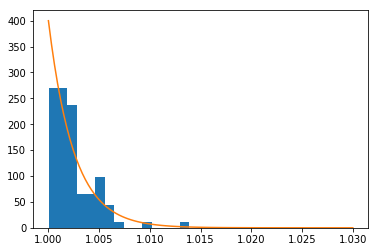

Valor esperado con la transformada inversa es:  1.0023818364756407
El error esperado con la transformada inversa es de:  0.0023818364756407195


In [11]:
E_fx = 1
N = 100
datos = np.random.rand(N)*400
x = np.linspace(1,1.03,N)
inversa = (np.log(400/datos)/400)+1
densidad = 400*np.exp(-400*(x-1))
plt.hist(inversa,15, density = True)
plt.plot(x,densidad)
plt.show()
E_fx_inv = np.mean(inversa)
print('Valor esperado con la transformada inversa es: ',E_fx_inv)
EE_fx = E_fx - E_fx
EE_fx_inv = E_fx_inv - E_fx
print('El error esperado con la transformada inversa es de: ',EE_fx_inv )


c). Repita el inciso anterior pero en esta ocasión utilice el método de aceptación y rechazo para generar las muestras aleatorias.

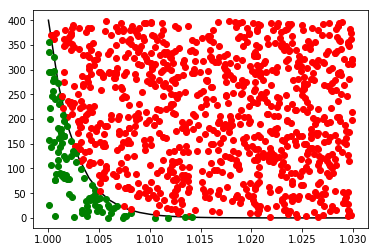

Valor esperado con aceptación y rechazo es de:  1.0153209822856315
El error esperado con la transformada inversa es de:  0.015320982285631501


In [12]:
N = 1000
f = lambda x: 400*np.exp(-400*(x-1))
x = np.arange(1,1.03,0.001)
plt.plot(x,f(x),'k')
u1 = np.random.uniform(1,1.03,N)
u2 = np.random.uniform(0,400,N)
for i in range(N):
    if u2[i] <= f(u1[i]):
        plt.plot(u1[i],u2[i],'og')
    else:
        plt.plot(u1[i],u2[i],'or')
plt.show()
ac_re = np.mean(u1)
print('Valor esperado con aceptación y rechazo es de: ', ac_re)
print('El error esperado con la transformada inversa es de: ',np.mean(u1)-E_fx)

**Se desea estimar la media de esta distribución, usando el método montecarlo crudo y sus técnicas de reducción de varianza con muestras de tamaño 10,100 y 1000. Estas cantidades de muestras para cada uno de los siguientes literales:** 

d). Use el método de montecarlo crudo para estimar la media.

In [25]:
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))
N = [10,100,1000]
a = 1
b = 1.03
U = list(map(lambda N:np.random.uniform(a,b,N),N)) # Números aleatorios dependiente de la cantidad de términos N
I_m = list(map(lambda Y:int_montecarlo(lambda x: 400*np.exp(-400*(x-1)),a,b,Y),U)) # Calculamos la aproximación por montecarlo dependiendo de la cantidad de términos que hayamos creado con ui
#por el tipo de distribución tan "delgada", la aproximación es pésima con pocos datos.
print('La media del Montecarlo crudo con 10 es:',I_m[0])
print('La media del Montecarlo crudo con 100 es:',I_m[1])
print('La media del Montecarlo crudo con 1000 es:',I_m[2])

La media del Montecarlo crudo con 10 es: 1.7280219776198587
La media del Montecarlo crudo con 100 es: 1.6009742863359728
La media del Montecarlo crudo con 1000 es: 1.0534118503884777


e). Use el método de muestreo estratificado con 5 estratos $0\leq F(x)\leq0.3, 0.3\leq F(x)\leq0.5, 0.5\leq F(x)\leq0.7, 0.7\leq F(x)\leq0.9 $ y $0.9\leq F(x) \leq 1$. Reparta el total de muestras en los estratos de la siguiente forma: estrato 1, 2, 3, 4, 5, 20%,20%,25%,15% y 20% de las muestras respectivamente.

Para calcular la distribución acumulada:
$$f(x) = 400\mathrm{e}^{-400(x-1)}$$ <br />
$$F(x) = \int_{1}^{x} 400\mathrm{e}^{-400(x-1)} dx $$
$$400 \int_{1}^{x} \mathrm{e}^{-400(x-1)} dx$$ <br />
$$ u = -400(x-1) = 400 - 400x \hspace{5mm} du = -400 dx $$ <br />
$$\frac{400}{-400} \int_{400}^{-400(x-1)} \mathrm{e}^{u} du = \int_{-400(x-1)}^{0} \mathrm{e}^{u} du $$ <br />
$$ \mathrm{e}^{u} \big{|}_{-400(x-1)}^{0} = 1 - \mathrm{e}^{-400(x-1)}$$ <br />
$$ inv(F(x)) = -\frac{ln(1-x)}{400} +1$$

In [26]:
N=10
r1 = np.random.uniform(0,0.3,2)
r2 = np.random.uniform(0.3,0.5,2)
r3 = np.random.uniform(0.5,0.7,3)
r4 = np.random.uniform(0.7,0.9,1)
r5 = np.random.uniform(0.9,1,2)
r  = [r1,r2,r3,r4,r5]
m  = range(len(r))
# Pesos
w1 = (len(r1)/N)/0.30
w2 = (len(r2)/N)/0.20
w3 = (len(r3)/N)/0.20
w4 = (len(r4)/N)/0.20
w5 = (len(r5)/N)/0.10
w  = [w1,w2,w3,w4,w5]
# Calculo
xi_estra2 = list(map(lambda r: -((np.log(1-r))/(400))+1,r))
muestras = np.concatenate([(xi_estra2[i]/w[i]) for i in m])
m_estrat1 = np.mean(muestras)
print('La media por el metodo de MonteCarlo estratificado es de 10 muestras es de: ',m_estrat1)

La media por el metodo de MonteCarlo estratificado es de 10 muestras es de:  1.002644259205106


In [27]:
N=100
r1 = np.random.uniform(0,0.3,20)
r2 = np.random.uniform(0.3,0.5,20)
r3 = np.random.uniform(0.5,0.7,25)
r4 = np.random.uniform(0.7,0.9,15)
r5 = np.random.uniform(0.9,1,20)
r  = [r1,r2,r3,r4,r5]
m  = range(len(r))
# Pesos
w1 = (len(r1)/N)/0.30
w2 = (len(r2)/N)/0.20
w3 = (len(r3)/N)/0.20
w4 = (len(r4)/N)/0.20
w5 = (len(r5)/N)/0.10
w  = [w1,w2,w3,w4,w5]
# Calculo
xi_estra2 = list(map(lambda r: -((np.log(1-r))/(400))+1,r))
muestras = np.concatenate([(xi_estra2[i]/w[i]) for i in m])
m_estrat2 = np.mean(muestras)
print('La media por el metodo de MonteCarlo estratificado es de 100 muestras es de: ',m_estrat2)

La media por el metodo de MonteCarlo estratificado es de 100 muestras es de:  1.0025878362180163


In [28]:
N=1000
r1 = np.random.uniform(0,0.3,200)
r2 = np.random.uniform(0.3,0.5,200)
r3 = np.random.uniform(0.5,0.7,250)
r4 = np.random.uniform(0.7,0.9,150)
r5 = np.random.uniform(0.9,1,200)
r  = [r1,r2,r3,r4,r5]
m  = range(len(r))
# Pesos
w1 = (len(r1)/N)/0.30
w2 = (len(r2)/N)/0.20
w3 = (len(r3)/N)/0.20
w4 = (len(r4)/N)/0.20
w5 = (len(r5)/N)/0.10
w  = [w1,w2,w3,w4,w5]
# Calculo
xi_estra2 = list(map(lambda r: -((np.log(1-r))/(400))+1,r))
muestras = np.concatenate([(xi_estra2[i]/w[i]) for i in m])
m_estrat3 = np.mean(muestras)
print('La media por el metodo de MonteCarlo estratificado es de 1000 muestras es de: ',m_estrat3)

La media por el metodo de MonteCarlo estratificado es de 1000 muestras es de:  1.002480678473923


f). Use el método de los números complementarios.

In [31]:
def Met_comp(M:'muestras'):
    # Generación de Números aleatorios
    ri = np.random.rand(M)
    xi = (-np.log(ri)/400) + 1
    # Media de observaciones aleatorias
    m_rand = np.mean(xi)
    # Números aleatorios complementarios
    ri_c = 1-ri
    xi_c = -np.log(ri_c)
    # Media de observaciones complementarias
    m_comple = np.mean(xi_c)
    m_estimada = (m_rand+m_comple)/2
    return m_estimada
m_estimada1 = Met_comp(10)
m_estimada2 = Met_comp(100)
m_estimada3 = Met_comp(1000)
print('La media por el metodo de MonteCarlo numero complementarios es de=',m_estimada1)
print('La media por el metodo de MonteCarlo numero complementarios es de=',m_estimada2)
print('La media por el metodo de MonteCarlo numero complementarios es de=',m_estimada3)

La media por el metodo de MonteCarlo numero complementarios es de= 1.2189193183851785
La media por el metodo de MonteCarlo numero complementarios es de= 1.0365382602088065
La media por el metodo de MonteCarlo numero complementarios es de= 1.0266101771267082


g). Finalmente use el método de estratificación en el cúal se divide en N estratos.

In [55]:
# Integración montecarlo
def Muestreo_estratificado(B:'número de estratos',a:'limite inferior',b:'limite superior'):
    delta = (b-a)/B
    v=[]
    i = 0
    while i <= B-1:
        v.append(np.random.uniform(a+i*delta,a+(i+1)*delta,1))
        i+=1
    v = np.concatenate(v, axis=0 )
    return v
N = [10,100,1000]
a = 1
b = 1.03
vi_1 = Muestreo_estratificado(N[0],a,b) # Números aleatorios dependiente de la cantidad de términos N
vi_2 = Muestreo_estratificado(N[1],a,b)
vi_3 = Muestreo_estratificado(N[2],a,b)
np.random.shuffle(vi_1)
np.random.shuffle(vi_2)
np.random.shuffle(vi_3)
I_estra_1 = np.mean(int_montecarlo(lambda x: 400*np.exp(-400*(x-1)),a,b,vi_1)) # Calculamos la aproximación por montecarlo dependiendo de la cantidad de términos que hayamos creado con ui
I_estra_2 = np.mean(int_montecarlo(lambda x: 400*np.exp(-400*(x-1)),a,b,vi_2)) # Calculamos la aproximación por montecarlo dependiendo de la cantidad de términos que hayamos creado con ui
I_estra_3 = np.mean(int_montecarlo(lambda x: 400*np.exp(-400*(x-1)),a,b,vi_3)) # Calculamos la aproximación por montecarlo dependiendo de la cantidad de términos que hayamos creado con ui
print('La media del Montecarlo crudo con 10 es:',I_estra_1)
print('La media del Montecarlo crudo con 100 es:',I_estra_2)
print('La media del Montecarlo crudo con 1000 es:',I_estra_3)

La media del Montecarlo crudo con 10 es: 1.3187796157482943
La media del Montecarlo crudo con 100 es: 1.007408161569305
La media del Montecarlo crudo con 1000 es: 0.9999475165497054


h). Compare todos los resulados obtenidos con cada método en una tabla unsando la librería pandas, donde muestre segun la cantidad de términos usados, la aproximación de la media aproximada y su error relativo con el valor obtenido en el inciso a).

In [56]:
metodo = ['M. Analítico', 'M. Transformada Inversa','M. Aceptación-Rechazo','Montecarlo Crudo','','','M. Estratificado ','','','M. Complementarios','','','M. Estratificado B','','']
muestras = [0,1000,1000,10,100,1000,10,100,1000,10,100,1000,10,100,1000]
mean = [E_fx,E_fx_inv,ac_re,I_m[0],I_m[1],I_m[2],m_estrat1,m_estrat2,m_estrat3,m_estimada1,m_estimada2,m_estimada3,I_estra_1,I_estra_2,I_estra_3]
mean = np.array(mean)
error = abs((mean-E_fx)/E_fx)
tabla = pd.DataFrame(index=metodo,columns=['Cantidad de Muestras','Media Aproximada','Error'])
tabla.index.name = "Pruebas"
tabla['Cantidad de Muestras'] = muestras
tabla['Media Aproximada'] = mean
tabla['Error'] = error
tabla

,Cantidad de Muestras,Media Aproximada,Error
Pruebas,,,
M. Analítico,0,1.000000,0.000000
M. Transformada Inversa,1000,1.002382,0.002382
M. Aceptación-Rechazo,1000,1.015321,0.015321
Montecarlo Crudo,10,1.728022,0.728022
,100,1.600974,0.600974
,1000,1.053412,0.053412
M. Estratificado,10,1.002644,0.002644
,100,1.002588,0.002588
,1000,1.002481,0.002481


# 6
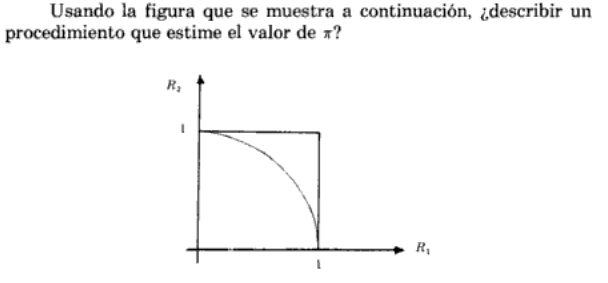

## <font color = 'red'> Nota: </font> Use el método de integración montecarlo visto en clase.
    
a). Use el método de montecarlo para aproximar el valor de pi para muestras de tamaño 100,1000,10000,1000000 y comparelo con su valor real. 

Sabemos que el área del cuadrado es: $1$ unidad × $1$ unidad = $1$ Unidades cuadradas. El área de la región más cercana al origen es una cuarta parte del área de un círculo, es decir: $\frac{\pi  r^{2}}{4}$. Dado que el radio $r$ mide 1 Unidad el área de la región de un cuarto de cículo equivale a $\frac{\pi 1^{2}}{4} = \frac{\pi}{4}$ Unidades cuadradas.

En el juego de los dardos se puede ejemplificar una forma de calcular el número $\pi$. Si $N$ es el total de dardos lanzados y $a$ es la cantidad de dardos que dieron en la región de un cuarto de círculo, entonces se puede considerar que $\frac{a}{N}$ se aproxima al cociente del área del cuarto de círculo $\frac{\pi}{4}$ Unidades cuadradas entre el área de todo el tablero $1$ Unidades cuadradas:
$$\frac{\frac{\pi}{4}}{\frac{1}{1}} = \frac{a}{N} \longrightarrow \frac{\pi}{4} = \frac{a}{N}$$
$$ \pi = \frac{4 a}{N} $$

In [57]:
def Monte_Carlo_Pi(N:'muestras'):
    c = 0 #contador de estimación
    a = 0 #contador de estimación
    while c < N:
        x = np.random.rand() #aleatorio entre [0,1] del eje x
        y = np.random.rand() #aleatorio entre [0,1] del eje y
        if x**2+y**2 <= 1: #condicionde triangulo caraterístico
            a+=1 #contador de estimación de cumplimiento de condicion
        c += 1 #contador de estimación de NO cumplimiento de condicion
    pi = 4*(a)/N #
    return pi

In [59]:
pi = np.array([np.pi,Monte_Carlo_Pi(10),Monte_Carlo_Pi(100),Monte_Carlo_Pi(1000),Monte_Carlo_Pi(10000),Monte_Carlo_Pi(1000000)])
error = abs((pi-np.pi)/np.pi)
#Grafica
N = [0,10,100,1000,10000,1000000]
tabla = pd.DataFrame(index=N,columns=['Valor Pi','Error'])
tabla.index.name = "Iteraciones"
tabla['Valor Pi'] = pi
tabla['Error'] = error
tabla

,Valor Pi,Error
Iteraciones,,
0,3.141593,0.000000
10,2.400000,0.236056
100,3.080000,0.019606
1000,3.144000,0.000766
10000,3.121600,0.006364
1000000,3.141364,0.000073


b). Repita el inciso anterior usando todos los método de reducción de varianza utilizados en el ejercicio *5*, para constrastar los resultados . Explique sus resultados.

In [60]:
def Monte_Carlo_Pi_Crudo(N:'muestras',a:'Límite inferior de la integral',b:'Límite superior de la integral',f:'función'):
    c = 0 #contador de estimación
    a = 0 #contador de estimación
    while c < N:
        x = np.random.uniform(a,b,N) #aleatorio entre [0,1] del eje x
        y = np.random.uniform(a,b,N) #aleatorio entre [0,1] del eje y
        for i in range(N):
            if f(x[i],y[i]) <= 1: #condicionde triangulo caraterístico
                a+=1 #contador de estimación de cumplimiento de condicion
            c += 1 #contador de estimación de NO cumplimiento de condicion
    pi = 4*(a)/N #
    return pi

In [61]:
#Montecarlo Crudo
N = [10,100,1000,10000,1000000]
a = 0
b = 1
pi_mc1 = Monte_Carlo_Pi_Crudo(N[0],a,b,lambda x,y: x**2+y**2) # Calculamos la aproximación por montecarlo dependiendo de la cantidad de términos que hayamos creado con ui
pi_mc2 = Monte_Carlo_Pi_Crudo(N[1],a,b,lambda x,y: x**2+y**2)
pi_mc3 = Monte_Carlo_Pi_Crudo(N[2],a,b,lambda x,y: x**2+y**2)
pi_mc4 = Monte_Carlo_Pi_Crudo(N[3],a,b,lambda x,y: x**2+y**2) 
pi_mc5 = Monte_Carlo_Pi_Crudo(N[4],a,b,lambda x,y: x**2+y**2)
print('La media estimada de pi del Montecarlo crudo con 10 es:',pi_mc1)
print('La media estimada de pi del Montecarlo crudo con 100 es:',pi_mc2)
print('La media estimada de pi del Montecarlo crudo con 1000 es:',pi_mc3)
print('La media estimada de pi del Montecarlo crudo con 10000 es:',pi_mc4)
print('La media estimada de pi del Montecarlo crudo con 1000000 es:',pi_mc5)

La media estimada de pi del Montecarlo crudo con 10 es: 2.8
La media estimada de pi del Montecarlo crudo con 100 es: 3.2
La media estimada de pi del Montecarlo crudo con 1000 es: 3.156
La media estimada de pi del Montecarlo crudo con 10000 es: 3.1604
La media estimada de pi del Montecarlo crudo con 1000000 es: 3.141888


In [62]:
def Monte_Carlo_Pi_Est(x:'aleatorios1 ya evaluados en f = lambda x,y: x**2+y**2',N):
    c = 0 #contador de estimación
    a = 0 #contador de estimación
    for i in range(N):
        if x[i] <= 1: #condicionde triangulo caraterístico
            a+=1 #contador de estimación de cumplimiento de condicion
        c += 1 #contador de estimación de NO cumplimiento de condicion
    pi = 4*(a)/N #
    return pi

In [63]:
N=10
r11 = np.random.uniform(0,0.3,2)
r12 = np.random.uniform(0.3,0.5,2)
r13 = np.random.uniform(0.5,0.7,3)
r14 = np.random.uniform(0.7,0.9,1)
r15 = np.random.uniform(0.9,1,2)
rs1  = [r11,r12,r13,r14,r15]
r21 = np.random.uniform(0,0.3,2)
r22 = np.random.uniform(0.3,0.5,2)
r23 = np.random.uniform(0.5,0.7,3)
r24 = np.random.uniform(0.7,0.9,1)
r25 = np.random.uniform(0.9,1,2)
rs2  = [r21,r22,r23,r24,r25]
m  = range(len(rs1))
# Pesos
w1 = (len(r1)/N)/0.30
w2 = (len(r2)/N)/0.20
w3 = (len(r3)/N)/0.20
w4 = (len(r4)/N)/0.20
w5 = (len(r5)/N)/0.10
w  = [w1,w2,w3,w4,w5]
# Calculo
xi_estra = list(map(lambda x,y: x**2+y**2,rs1,rs2))
for i in m:
    xi_estra[i]/w[i]        
muestras = Monte_Carlo_Pi_Est(np.concatenate(xi_estra, axis = 0),N)
pi_estrat1 = np.mean(muestras)
print('La media por el metodo de MonteCarlo estratificado es de 100 muestras es de: ',pi_estrat1)

La media por el metodo de MonteCarlo estratificado es de 100 muestras es de:  2.8


In [64]:
N=100
r11 = np.random.uniform(0,0.3,20)
r12 = np.random.uniform(0.3,0.5,20)
r13 = np.random.uniform(0.5,0.7,35)
r14 = np.random.uniform(0.7,0.9,15)
r15 = np.random.uniform(0.9,1,20)
rs1  = [r11,r12,r13,r14,r15]
r21 = np.random.uniform(0,0.3,20)
r22 = np.random.uniform(0.3,0.5,20)
r23 = np.random.uniform(0.5,0.7,35)
r24 = np.random.uniform(0.7,0.9,15)
r25 = np.random.uniform(0.9,1,20)
rs2  = [r21,r22,r23,r24,r25]
m  = range(len(rs1))
# Pesos
w1 = (len(r1)/N)/0.30
w2 = (len(r2)/N)/0.20
w3 = (len(r3)/N)/0.20
w4 = (len(r4)/N)/0.20
w5 = (len(r5)/N)/0.10
w  = [w1,w2,w3,w4,w5]
# Calculo
xi_estra = list(map(lambda x,y: x**2+y**2,rs1,rs2))
for i in m:
    xi_estra[i]/w[i]        
muestras = Monte_Carlo_Pi_Est(np.concatenate(xi_estra, axis = 0),N)
pi_estrat2 = np.mean(muestras)
print('La media por el metodo de MonteCarlo estratificado es de 100 muestras es de: ',pi_estrat2)

La media por el metodo de MonteCarlo estratificado es de 100 muestras es de:  3.0


In [65]:
N=1000
r11 = np.random.uniform(0,0.3,200)
r12 = np.random.uniform(0.3,0.5,200)
r13 = np.random.uniform(0.5,0.7,350)
r14 = np.random.uniform(0.7,0.9,150)
r15 = np.random.uniform(0.9,1,200)
rs1  = [r11,r12,r13,r14,r15]
r21 = np.random.uniform(0,0.3,200)
r22 = np.random.uniform(0.3,0.5,200)
r23 = np.random.uniform(0.5,0.7,350)
r24 = np.random.uniform(0.7,0.9,150)
r25 = np.random.uniform(0.9,1,200)
rs2  = [r21,r22,r23,r24,r25]
m  = range(len(rs1))
# Pesos
w1 = (len(r1)/N)/0.30
w2 = (len(r2)/N)/0.20
w3 = (len(r3)/N)/0.20
w4 = (len(r4)/N)/0.20
w5 = (len(r5)/N)/0.10
w  = [w1,w2,w3,w4,w5]
# Calculo
xi_estra = list(map(lambda x,y: x**2+y**2,rs1,rs2))
for i in m:
    xi_estra[i]/w[i]        
muestras = Monte_Carlo_Pi_Est(np.concatenate(xi_estra, axis = 0),N)
pi_estrat3 = np.mean(muestras)
print('La media por el metodo de MonteCarlo estratificado es de 100 muestras es de: ',pi_estrat3)

La media por el metodo de MonteCarlo estratificado es de 100 muestras es de:  3.0


In [66]:
N=10000
r11 = np.random.uniform(0,0.3,2000)
r12 = np.random.uniform(0.3,0.5,2000)
r13 = np.random.uniform(0.5,0.7,3500)
r14 = np.random.uniform(0.7,0.9,1500)
r15 = np.random.uniform(0.9,1,2000)
rs1  = [r11,r12,r13,r14,r15]
r21 = np.random.uniform(0,0.3,2000)
r22 = np.random.uniform(0.3,0.5,2000)
r23 = np.random.uniform(0.5,0.7,3500)
r24 = np.random.uniform(0.7,0.9,1500)
r25 = np.random.uniform(0.9,1,2000)
rs2  = [r21,r22,r23,r24,r25]
m  = range(len(rs1))
# Pesos
w1 = (len(r1)/N)/0.30
w2 = (len(r2)/N)/0.20
w3 = (len(r3)/N)/0.20
w4 = (len(r4)/N)/0.20
w5 = (len(r5)/N)/0.10
w  = [w1,w2,w3,w4,w5]
# Calculo
xi_estra = list(map(lambda x,y: x**2+y**2,rs1,rs2))
for i in m:
    xi_estra[i]/w[i]        
muestras = Monte_Carlo_Pi_Est(np.concatenate(xi_estra, axis = 0),N)
pi_estrat4 = np.mean(muestras)
print('La media por el metodo de MonteCarlo estratificado es de 100 muestras es de: ',pi_estrat4)

La media por el metodo de MonteCarlo estratificado es de 100 muestras es de:  3.0004


In [67]:
N=1000000
r11 = np.random.uniform(0,0.3,200000)
r12 = np.random.uniform(0.3,0.5,200000)
r13 = np.random.uniform(0.5,0.7,350000)
r14 = np.random.uniform(0.7,0.9,150000)
r15 = np.random.uniform(0.9,1,200000)
rs1  = [r11,r12,r13,r14,r15]
r21 = np.random.uniform(0,0.3,200000)
r22 = np.random.uniform(0.3,0.5,200000)
r23 = np.random.uniform(0.5,0.7,350000)
r24 = np.random.uniform(0.7,0.9,150000)
r25 = np.random.uniform(0.9,1,200000)
rs2  = [r21,r22,r23,r24,r25]
m  = range(len(rs1))
# Pesos
w1 = (len(r1)/N)/0.30
w2 = (len(r2)/N)/0.20
w3 = (len(r3)/N)/0.20
w4 = (len(r4)/N)/0.20
w5 = (len(r5)/N)/0.10
w  = [w1,w2,w3,w4,w5]
# Calculo
xi_estra = list(map(lambda x,y: x**2+y**2,rs1,rs2))
for i in m:
    xi_estra[i]/w[i]        
muestras = Monte_Carlo_Pi_Est(np.concatenate(xi_estra, axis = 0),N)
pi_estrat5 = np.mean(muestras)
print('La media por el metodo de MonteCarlo estratificado es de 100 muestras es de: ',pi_estrat5)

La media por el metodo de MonteCarlo estratificado es de 100 muestras es de:  3.0016


In [68]:
def Met_comp(M:'muestras'):
    # Generación de Números aleatorios
    ri1 = np.random.rand(M)
    ri2 = np.random.rand(M)
    f = lambda x,y: x**2+y**2
    xi = Monte_Carlo_Pi_Est(f(ri1,ri2),M)
    # Media de observaciones aleatorias
    m_rand = np.mean(xi)
    # Números aleatorios complementarios
    ri_c1 = 1-ri1
    ri_c2 = 1-ri2
    xi_c = Monte_Carlo_Pi_Est(f(ri_c1,ri_c2),M)    
    # Media de observaciones complementarias
    m_comple = np.mean(xi_c)
    m_estimada = (m_rand+m_comple)/2
    return m_estimada
pi_estimada1 = Met_comp(10)
pi_estimada2 = Met_comp(100)
pi_estimada3 = Met_comp(1000)
pi_estimada4 = Met_comp(10000)
pi_estimada5 = Met_comp(1000000)
print('La media por el metodo de MonteCarlo numero complementarios 10 es de=',pi_estimada1)
print('La media por el metodo de MonteCarlo numero complementarios 100 es de=',pi_estimada2)
print('La media por el metodo de MonteCarlo numero complementarios 1000 es de=',pi_estimada3)
print('La media por el metodo de MonteCarlo numero complementarios 10000 es de=',pi_estimada4)
print('La media por el metodo de MonteCarlo numero complementarios 1000000 es de=',pi_estimada5)

La media por el metodo de MonteCarlo numero complementarios 10 es de= 3.0
La media por el metodo de MonteCarlo numero complementarios 100 es de= 3.1
La media por el metodo de MonteCarlo numero complementarios 1000 es de= 3.16
La media por el metodo de MonteCarlo numero complementarios 10000 es de= 3.154
La media por el metodo de MonteCarlo numero complementarios 1000000 es de= 3.142582


In [69]:
# Integración montecarlo
def Muestreo_estratificado(B:'número de estratos',a:'limite inferior',b:'limite superior'):
    delta = (b-a)/B
    v=[]
    i = 0
    while i <= B-1:
        v.append(np.random.uniform(a+i*delta,a+(i+1)*delta,1))
        i+=1
    v = np.concatenate(v, axis=0)
    return v
N = [10,100,1000,10000,1000000]
a = 0
b = 1
vi_11 = Muestreo_estratificado(N[0],a,b) # Números aleatorios dependiente de la cantidad de términos N
vi_12 = Muestreo_estratificado(N[1],a,b)
vi_13 = Muestreo_estratificado(N[2],a,b)
vi_14 = Muestreo_estratificado(N[3],a,b)
vi_15 = Muestreo_estratificado(N[4],a,b)
vi_21 = Muestreo_estratificado(N[0],a,b) # Números aleatorios dependiente de la cantidad de términos N
vi_22 = Muestreo_estratificado(N[1],a,b)
vi_23 = Muestreo_estratificado(N[2],a,b)
vi_24 = Muestreo_estratificado(N[3],a,b)
vi_25 = Muestreo_estratificado(N[4],a,b)

In [70]:
#para evitar sesgo se reacomodan aleatoriamente los numeros aleatorios generados estratificadamente
np.random.shuffle(vi_11)
np.random.shuffle(vi_12)
np.random.shuffle(vi_13)
np.random.shuffle(vi_14)
np.random.shuffle(vi_15)
np.random.shuffle(vi_21)
np.random.shuffle(vi_22)
np.random.shuffle(vi_23)
np.random.shuffle(vi_24)
np.random.shuffle(vi_25)
#Aplicacion del modelo
pi_estra_1 = np.asarray(list(map(lambda x,y: x**2+y**2,vi_11,vi_21)))
pi_estra_2 = np.asarray(list(map(lambda x,y: x**2+y**2,vi_12,vi_22)))
pi_estra_3 = np.asarray(list(map(lambda x,y: x**2+y**2,vi_13,vi_23)))
pi_estra_4 = np.asarray(list(map(lambda x,y: x**2+y**2,vi_14,vi_24)))
pi_estra_5 = np.asarray(list(map(lambda x,y: x**2+y**2,vi_15,vi_25)))
pi_estB_1 = np.mean(Monte_Carlo_Pi_Est(pi_estra_1,N[0]))
pi_estB_2 = np.mean(Monte_Carlo_Pi_Est(pi_estra_2,N[1]))
pi_estB_3 = np.mean(Monte_Carlo_Pi_Est(pi_estra_3,N[2]))
pi_estB_4 = np.mean(Monte_Carlo_Pi_Est(pi_estra_4,N[3]))
pi_estB_5 = np.mean(Monte_Carlo_Pi_Est(pi_estra_5,N[4]))
print('La media del Montecarlo crudo con 10 es:',pi_estB_1)
print('La media del Montecarlo crudo con 100 es:',pi_estB_2)
print('La media del Montecarlo crudo con 1000 es:',pi_estB_3)
print('La media del Montecarlo crudo con 10000 es:',pi_estB_4)
print('La media del Montecarlo crudo con 1000000 es:',pi_estB_5)

La media del Montecarlo crudo con 10 es: 3.2
La media del Montecarlo crudo con 100 es: 3.32
La media del Montecarlo crudo con 1000 es: 3.132
La media del Montecarlo crudo con 10000 es: 3.1328
La media del Montecarlo crudo con 1000000 es: 3.144288


In [71]:
metodo = ['M. Analítico', 'Montecarlo Crudo','','','','','M. Estratificado ','','','','','M. Complementarios','','','','','M. Estratificado B','','','','']
muestras = [0,10,100,1000,10000,1000000,10,100,1000,10000,1000000,10,100,1000,10000,1000000,10,100,1000,10000,1000000]
mean = [np.pi,pi_mc1,pi_mc2,pi_mc3,pi_mc4,pi_mc5,pi_estrat1,pi_estrat2,pi_estrat3,pi_estrat4,pi_estrat5,pi_estimada1,pi_estimada2,pi_estimada3,pi_estimada4,pi_estimada5,pi_estB_1,pi_estB_2,pi_estB_3,pi_estB_4,pi_estB_5]
mean = np.array(mean)
error = abs((mean-np.pi)/np.pi)
tabla = pd.DataFrame(index=metodo,columns=['Cantidad de Muestras','Media Aproximada','Error'])
tabla.index.name = "Pruebas"
tabla['Cantidad de Muestras'] = muestras
tabla['Media Aproximada'] = mean
tabla['Error'] = error
tabla

,Cantidad de Muestras,Media Aproximada,Error
Pruebas,,,
M. Analítico,0,3.141593,0.000000
Montecarlo Crudo,10,2.800000,0.108732
,100,3.200000,0.018592
,1000,3.156000,0.004586
,10000,3.160400,0.005987
,1000000,3.141888,0.000094
M. Estratificado,10,2.800000,0.108732
,100,3.000000,0.045070
,1000,3.000000,0.045070


Se concluye que para el calculo del número $\pi$ los métodos que fallan son los de estratificación por que al hacerlo directamente relacionas en $x^{2}+y^{2}$ numerós de tamaños similares, es decir, pequeños con pequeños, y grandes con grandes.

**Valor de los ejercicios**
- 1- 2 puntos
- 2- 2 puntos
- 3- 1 punto
- 4- 1 punto
- 5- 3 puntos
- 6- 1 punto

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>